## Superposición 2 qubits medición en bases distintas y ejecución con estimator

ESTADO DE BELL CON DOS QUIT Y EJECUCIÓN EN ESTIMATOR

https://github.com/derek-wang-ibm/coding-with-qiskit/blob/main/episode-3-hello-world.ipynb
https://www.youtube.com/watch?v=93-zLTppFZw&list=PLZIvznntA6uKiXmqwd9xEWAWK0CUhtImA&index=1&t=48s
https://quantum.cloud.ibm.com/docs/es/tutorials/hello-world

En un programa cuántico, los circuitos cuánticos son el formato nativo para representar instrucciones cuánticas, y los operadores representan los observables que se van a medir. Al crear un circuito, normalmente:

    - se crea un nuevo objeto QuantumCircuito 
    - y luego se le añaden instrucciones secuencialmente.

La siguiente celda de código crea un circuito que produce un estado de Bell, que es un estado en el que dos qubits están completamente entrelazados entre sí.

**Paso 1: Asignar el problema a circuitos y operadores**

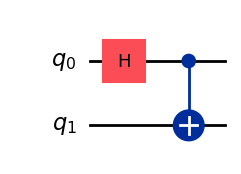

In [1]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0, 1)

qc.draw(output='mpl')
# No he ejecutado el circuito, pero si lo hiciera, obtendría un estado de Bell 
# entre los dos qubits.

In [2]:
from qiskit.quantum_info import Pauli
# Paulis para medir correlaciones entre qubits, esto significa
# que se pueden medir correlaciones entre los qubits en un estado de Bell.
# Las correlaciones significan que si se mide un qubit, el otro qubit
# tendrá un valor correlacionado con el primero, incluso si están separados
# por una gran distancia. Esto es lo que se conoce como entrelazamiento cuántico.
# Los estados de Bell son un ejemplo de entrelazamiento cuántico.

# Pauli ZZ significa que se mide el primer qubit en la base Z y el segundo qubit en la base Z.
ZZ = Pauli('ZZ')
# Pauli ZI significa que se mide el primer qubit en la base Z y el segundo qubit en la base I 
# (identidad).
ZI = Pauli('ZI')
# Pauli IZ significa que se mide el primer qubit en la base I (identidad) y el segundo qubit 
# en la base Z.
IZ = Pauli('IZ')
# Pauli XX significa que se mide el primer qubit en la base X y el segundo qubit en la base X.
XX = Pauli('XX')
# Pauli IX significa que se mide el primer qubit en la base I (identidad) y el segundo qubit
# en la base X.
XI = Pauli('XI')
# Pauli XI significa que se mide el primer qubit en la base X y el segundo qubit en la base 
# I (identidad).
IX = Pauli('IX')

# los observables son los que se van a medir en el circuito,
# y se utilizan para calcular las correlaciones entre los qubits.
observables = [ZZ, ZI, IZ, XX, XI, IX]

**Paso 2: Optimizamos el circuito**

Las computadoras cuánticas pueden producir resultados aleatorios, por lo que se suele recopilar una muestra de las salidas ejecutando el circuito varias veces. Se puede estimar el valor del observable utilizando la clase Estimator. Estimator es una de dos primitivas; la otra es Sampler, que permite obtener datos de una computadora cuántica. Estos objetos poseen un método run() que ejecuta la selección de circuitos, observables y parámetros (si corresponde), utilizando un bloque unificado de primitivas (PUB).

Al ejecutar circuitos en un dispositivo, es importante optimizar el conjunto de instrucciones que contiene y minimizar su profundidad total (aproximadamente el número de instrucciones). Esto garantiza la obtención de los mejores resultados posibles al reducir los efectos de errores y ruido. Además, las instrucciones del circuito deben ajustarse a la Arquitectura del Conjunto de Instrucciones (ISA) del dispositivo backend y considerar las puertas base y la conectividad de cúbits del dispositivo.

El siguiente código instancia un dispositivo real al que se le envía un trabajo y transforma el circuito y los observables para que coincidan con la ISA de ese backend. Requiere que ya haya guardado sus credenciales para poder utilizar la máquina física. 

**De momento todavía no lo hemos conseguido**

https://quantum.cloud.ibm.com/docs/es/tutorials/hello-world


In [9]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
service = QiskitRuntimeService()

# service.least_busy() nos da el backend menos ocupado que está disponible para ejecutar el circuito.
# simulator=False significa que no queremos un simulador, sino un backend real.
# operational=True significa que queremos un backend que esté operativo y no en mantenimiento.
# Esto es útil para ejecutar circuitos en un backend real y obtener resultados reales.
from qiskit_ibm_runtime import generate_preset_pass_manager

backend = service.least_busy(simulator=False, operational=True)
 
# generate_preset_pass_manager() crea un administrador de pasadas preestablecido para el backend seleccionado
# esto significa que se aplicarán optimizaciones específicas para el backend seleccionado.
# optimization_level=1 significa que se aplicará un nivel de optimización bajo, lo que
# significa que se aplicarán algunas optimizaciones, pero no todas.
# Esto es útil para circuitos pequeños o medianos, ya que no queremos que las optimizaciones
# tomen demasiado tiempo y queremos obtener resultados rápidamente.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
#isa_circuit es el circuito optimizado que se ha ejecutado en el backend seleccionado. 
isa_circuit.draw("mpl", idle_wires=False)

AccountNotFoundError: 'Unable to find account.'

NO CONSIGUE CONECTARSE CON LA MÁQUINA REAL, DE MOMENTO NO TENEMOS CONEXIÓN.

**Primitivas**
Una primitiva de estimador calcula los valores esperados de los observables con respecto a los estados generados por circuitos cuánticos. Los usuarios generalmente especifican una lista de circuitos, observables y, posiblemente, alguna configuración adicional, con la que el programa puede evaluar eficientemente los valores esperados y las varianzas.

Una primitiva de muestreo calcula probabilidades o cuasiprobabilidades de cadenas de bits de circuitos cuánticos. Las cuasiprobabilidades son similares a las probabilidades regulares, salvo que pueden incluir valores negativos, lo cual puede ocurrir al utilizar ciertas técnicas de mitigación de errores.

En general, las primitivas permiten a un usuario avanzado escribir algoritmos cuánticos sin preocuparse por los detalles del hardware. Por lo tanto, tareas importantes, como la estimación de operadores, pueden gestionarse a un nivel inferior sin necesidad de intervención del usuario.

In [4]:
from qiskit_aer.primitives import Estimator
# El Estimator es una clase que se utiliza para estimar los valores esperados de los observables en un circuito cuántico.
# 
estimator = Estimator()

job = estimator.run([qc] * len(observables), observables)
# estimator.run ejecuta el circuito en el backend seleccionado y calcula los valores esperados de los observables.
# job es un objeto que representa el trabajo que se ha enviado al backend para su ejecución.
# Estimator de aer.primitives es una clase que simula la ejecución de circuitos cuánticos y calcula los valores esperados de los observables.

job.result()

EstimatorResult(values=array([ 1.        , -0.06835938, -0.06835938,  1.        ,  0.04492188,
        0.04492188]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'time_taken': 0.006362291, 'num_bind_params': 1, 'parallel_state_update': 4, 'parallel_shots': 1, 'required_memory_mb': 0, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'stabilizer', 'device': 'CPU', 'num_qubits': 2, 'sample_measure_time': 0.000985166, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'remapped_qubits': False, 'runtime_parameter_bind': False, 'max_memory_mb': 7909, 'noise': 'ideal', 'measure_sampling': True, 'batched_shots_optimization': False, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.9953269958496094, 'simulator_metadata': [{'time_taken': 0.006362291, 'num_bind_params': 1, 'parallel_state_update': 4, 'parallel_shots': 1, 'required_memory_mb': 0, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'stabilizer', 'device': 'CPU', 'num_qubits': 2, 'sample_measure_time': 0.000

**Paso 4: Análisis de resultados**

El paso de análisis suele ser donde se posprocesan los resultados mediante, por ejemplo, la mitigación de errores de medición o la extrapolación de ruido cero (ZNE). Puede introducir estos resultados en otro flujo de trabajo para un análisis más profundo o preparar un gráfico de los valores clave y los datos. En general, este paso es específico para su problema. Para este ejemplo, grafique cada uno de los valores esperados medidos para nuestro circuito.

Se accede a los valores esperados y las desviaciones estándar de los observables especificados en Estimator mediante los atributos PubResult.data.evs y PubResult.data.stds del resultado del trabajo. Para obtener los resultados de Sampler, utilice la función PubResult.data.meas.get_counts(), que devolverá un diccionario de mediciones en forma de cadenas de bits como claves y recuentos como sus valores correspondientes. Para obtener más información, consulte Introducción a Sampler.

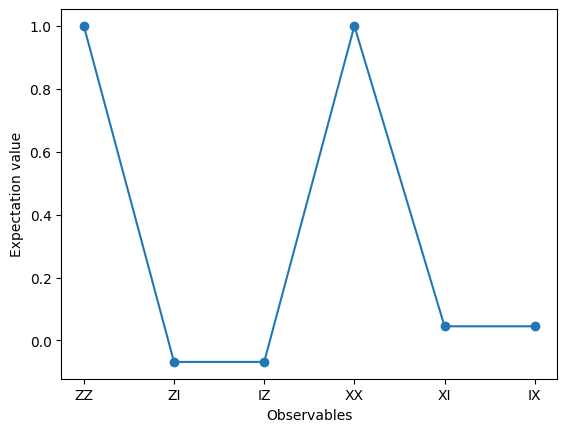

In [5]:
import matplotlib.pyplot as plt

data = ['ZZ', 'ZI', 'IZ', 'XX', 'XI', 'IX']
values = job.result().values

plt.plot(data, values, '-o')
plt.xlabel('Observables')
plt.ylabel('Expectation value')
plt.show()

** Ejecución con un fake provider **

Al ejecutar su programa cuántico en un dispositivo real, la carga de trabajo debe esperar en una cola antes de ejecutarse. Para ahorrar tiempo, puede usar el siguiente código para ejecutar esta pequeña carga de trabajo en fake_provider con el modo de prueba local de Qiskit Runtime. Tenga en cuenta que esto solo es posible para circuitos pequeños. 

In [6]:
#  Un fake provider es un proveedor de backend simulado que se utiliza para probar y desarrollar programas cuánticos sin necesidad 
# de un dispositivo cuántico real.
# El fake provider simula el comportamiento de un dispositivo cuántico real, lo que permite a los desarrolladores probar sus programas

from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2
backend2 = FakeAlmadenV2()
#FakeAlmadenV2 es un backend simulado de IBM que simula el comportamiento de un dispositivo cuántico real llamado Almaden V2.
estimator = Estimator()
 
# Convert to an ISA circuit and layout-mapped observables.
# Convertir a un circuito ISA significa que el circuito se ha optimizado para el backend seleccionado y se ha mapeado a los qubits del backend.

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
# generate_preset_pass_manager() crea un administrador de pasadas preestablecido para el backend seleccionado
# un administrador de pasadas es un objeto que se encarga de aplicar optimizaciones al circuito antes de ejecutarlo en el backend.
# optimization_level=1 significa que se aplicará un nivel de optimización bajo, lo que
# significa que se aplicarán algunas optimizaciones, pero no todas.
isa_circuit = pm.run(qc)
mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]
 
job = estimator.run([(isa_circuit, mapped_observables)])
result = job.result()
 
# Este es el resultado de todo el envío. 
# Enviamos un PUB por lo que contiene un resultado interno (y algunos metadatos propios).
# Un PUB es una unidad de procesamiento que se utiliza para ejecutar circuitos cuánticos en un backend. 
job_result = job.result()
 
# Este es el resultado de nuestra publicación única, que tenía cinco observables
# por lo que contiene información sobre los cinco.
 
pub_result = job.result()[0]



NameError: name 'generate_preset_pass_manager' is not defined

** continuar mirando las opciones de estas direcciones**

https://github.com/derek-wang-ibm/coding-with-qiskit/blob/main/episode-3-hello-world.ipynb
https://quantum.cloud.ibm.com/docs/es/tutorials/hello-world

https://www.youtube.com/watch?v=93-zLTppFZw&list=PLZIvznntA6uKiXmqwd9xEWAWK0CUhtImA&index=2&t=48s

In [7]:
from qiskit_ibm_runtime import EstimatorOptions
from qiskit_ibm_runtime import EstimatorV2 as Estimator
 
options = EstimatorOptions()
options.resilience_level = 1
options.dynamical_decoupling.enable = True
options.dynamical_decoupling.sequence_type = "XY4"
 
# Create an Estimator object
estimator = Estimator(backend, options=options)

NameError: name 'backend' is not defined

In [8]:
# Submit the circuit to Estimator
job = estimator.run([(isa_circuit, isa_operators_list)])
job_id = job.job_id()
print(job_id)

NameError: name 'isa_circuit' is not defined